# MGTA 495 Web Data and Business Decisions Project Code

### Chen Li, Yating Zhou, Yinuo Chen

### Part 1. Yelp Reviews Scraping- P.F. Chang's

In [9]:
import time
import random
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import pandas as pd
import re
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt

from collections import Counter
import glob


chrome_options = Options()
path='../MGTA414/chromedriver'
# chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [24]:
# get the urls of yelp webpage of p.f. chang's in southern california
# we collected data seperately in three times and save files in yelp_sd, yelp_7 and yelp_SouthCalifornia.csv
urls = ['https://www.yelp.com/biz/p-f-changs-san-diego-4?osq=p.f.chang%27s',
        'https://www.yelp.com/biz/p-f-changs-san-diego-3?osq=p.f.chang%27s',
        'https://www.yelp.com/biz/p-f-changs-carlsbad?osq=p.f.chang%27s',
        'https://www.yelp.com/biz/p-f-changs-chula-vista-2?osq=p.f.chang%27s',
        'https://www.yelp.com/biz/p-f-changs-rancho-cucamonga?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-chino-hills-2?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-pasadena-2?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-riverside-3?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-anaheim?osq=P+F+Chang',
        'https://www.yelp.com/biz/p-f-changs-cerritos-3?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-woodland-hills-3?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-torrance-3?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-sherman-oaks-4?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-mission-viejo-3?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-temecula-2?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-long-beach-2?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-irvine?osq=P+F+Chang', 
        'https://www.yelp.com/biz/p-f-changs-newport-beach-3?osq=P+F+Chang'
       ]


In [38]:
yelp = pd.DataFrame({'Restaurant': [], 'User_Name': [], 'Location': [], 'Time': [], 'Stars': [], 'Review': []})
for url in urls:
    Restaurant = []
    Names = []
    Places = []
    Stars = []
    Time = []
    Reviews = []
    driver = webdriver.Chrome('../MGTA414/chromedriver', options = chrome_options)    
    
    driver.get(url) # Start the browser and open 'url'
    
    time.sleep(random.uniform(3,7))
    # time.sleep(5)
    html = driver.page_source # Get the html of the page
    
#     driver.quit()

    soup = bs(html, 'html.parser')
    address = soup.find('p', class_ = "css-chtywg").text
#     num_reviews = soup.find_all('span', class_ = "text__373c0__1XRHf text-color--inherit__373c0__18fFy text-align--left__373c0__2NYYx text-weight--semibold__373c0__3wN1l text-size--small__373c0__3n0wb")[1].text
#     num_reviews = int(str(num_reviews).split('English (')[1].split(')')[0])
    num_reviews=int(re.findall("(\d+) reviews",soup.text)[0])
    print(num_reviews)
    for i in range(0,(num_reviews//10)+1):
        if i != 0:
            new_page = url+'&start='+str(i*10)
#             driver = webdriver.Chrome('../MGTA414/chromedriver')
            driver.get(new_page)
            time.sleep(random.uniform(3,7))
            html = driver.page_source
#             driver.quit()
            soup = bs(html, 'html.parser')
        reviews = soup.find_all('li', class_ = 'margin-b5__373c0__2ZFFk border-color--default__373c0__r305k')
        for j in range(0,len(reviews)):
            try:
                name = reviews[j].find("a",{"class":"css-166la90"}).text
            except:
                name = None
            try:
                place = reviews[j].find("span",{"class":"css-n6i4z7"}).text
            except:
                place = None
            try:
                stars = reviews[j].find("div",{"class":"i-stars__373c0___sZu0 i-stars--regular-5__373c0__20dKs border-color--default__373c0__r305k overflow--hidden__373c0__3E2fM"}).get('aria-label')
            except:
                try:
                    stars = reviews[j].find("div",{"class":"i-stars__373c0___sZu0 i-stars--regular-4__373c0__3b-zE border-color--default__373c0__r305k overflow--hidden__373c0__3E2fM"}).get('aria-label')
                except:
                    try:
                        stars = reviews[j].find("div",{"class":"i-stars__373c0___sZu0 i-stars--regular-3__373c0__3XiEH border-color--default__373c0__r305k overflow--hidden__373c0__3E2fM"}).get('aria-label')
                    except:
                        try:
                            stars = reviews[j].find("div",{"class":"i-stars__373c0___sZu0 i-stars--regular-2__373c0__2yu75 border-color--default__373c0__r305k overflow--hidden__373c0__3E2fM"}).get('aria-label')
                        except:
                            try:
                                stars = reviews[j].find("div",{"class":"i-stars__373c0___sZu0 i-stars--regular-1__373c0__2QZgK border-color--default__373c0__r305k overflow--hidden__373c0__3E2fM"}).get('aria-label')
                            except:
                                stars = None
            try:
                review_time = reviews[j].find('span',{"class": "css-e81eai"}).text
            except:
                review_time = None
            try:
                review = reviews[j].find("span",{"class":"raw__373c0__tQAx6"}).text
            except:
                review = None
   
            Names.append(name)
            Places.append(place)
            Stars.append(stars)
            Time.append(review_time)
            Reviews.append(review)
            Restaurant.append(address)
    print(f'''Names:{len(Names)}, Places: {len(Places)}, Stars: {len(Stars)}, Time: {len(Time)}, Restaurants: {len(Restaurant)}''')
    df = pd.DataFrame({'Restaurant': Restaurant, 'User_Name': Names, 'Location': Places, 'Time': Time, 'Stars': Stars, 'Review': Reviews})
    yelp = pd.concat([yelp,df])


KeyboardInterrupt: 

In [26]:
print(len(Names))
print(len(Places))
print(len(Stars))
print(len(Time))
print(len(Reviews))
print(len(Restaurant))

463
463
463
463
463
463


In [27]:
yelp.dropna(axis = 0, inplace = True, thresh = 4)

In [28]:
yelp.shape

(4370, 6)

In [30]:
yelp.head()

,Restaurant,User_Name,Location,Time,Stars,Review
0,"3525 Carson St Ste 166 Torrance, CA 90503",Kiran C.,"Los Angeles, CA",8/8/2021,3 star rating,We came to P.F. Chang's yesterday for my paren...
1,"3525 Carson St Ste 166 Torrance, CA 90503",Angela L.,"Torrance, CA",8/7/2021,3 star rating,Came here only because we got a goft card...le...
2,"3525 Carson St Ste 166 Torrance, CA 90503",Leo H.,"Ontario, CA",7/16/2021,1 star rating,We stopped by one of my favorite spots to eat ...
3,"3525 Carson St Ste 166 Torrance, CA 90503",Evan F.,"Redondo Beach, CA",10/28/2020,4 star rating,Updated review foe today only. Made online res...
4,"3525 Carson St Ste 166 Torrance, CA 90503",Sara R.,"Ontario, CA",3/26/2021,1 star rating,Terrible!!! We came in for a birthday party an...


In [31]:
def get_zip(string):
    zipcode = string.split(', CA ')[1]
    return zipcode

In [32]:
yelp['Zip_Code'] = yelp['Restaurant'].agg(lambda x: get_zip(x))

In [33]:
yelp['Stars'] = yelp['Stars'].transform(lambda x: x[0])

In [34]:
yelp.head()

,Restaurant,User_Name,Location,Time,Stars,Review,Zip_Code
0,"3525 Carson St Ste 166 Torrance, CA 90503",Kiran C.,"Los Angeles, CA",8/8/2021,3,We came to P.F. Chang's yesterday for my paren...,90503
1,"3525 Carson St Ste 166 Torrance, CA 90503",Angela L.,"Torrance, CA",8/7/2021,3,Came here only because we got a goft card...le...,90503
2,"3525 Carson St Ste 166 Torrance, CA 90503",Leo H.,"Ontario, CA",7/16/2021,1,We stopped by one of my favorite spots to eat ...,90503
3,"3525 Carson St Ste 166 Torrance, CA 90503",Evan F.,"Redondo Beach, CA",10/28/2020,4,Updated review foe today only. Made online res...,90503
4,"3525 Carson St Ste 166 Torrance, CA 90503",Sara R.,"Ontario, CA",3/26/2021,1,Terrible!!! We came in for a birthday party an...,90503


In [35]:
# yelp.to_csv('yelp.csv')
# yelp.to_csv('yelp7.csv')
# yelp.to_csv('yelp_SouthernCalifornia.csv')

### Part 2. Data Cleaning

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [9]:
yelp_sd = pd.read_csv('yelp.csv', parse_dates = ['Time'])
yelp_1 = pd.read_csv('yelp_SouthernCalifornia.csv', parse_dates = ['Time'])
yelp_2 = pd.read_csv('yelp7.csv', parse_dates = ['Time'])

In [10]:
def check_location(x):
    return len(x)

In [11]:
yelp_sd.Location.value_counts()[:5]

San Diego, CA      1063
Chula Vista, CA     166
Carlsbad, CA        145
Oceanside, CA        66
El Cajon, CA         55
Name: Location, dtype: int64

In [12]:
yelp_sd['location_check'] = yelp_sd['Location'].agg(lambda x: check_location(x))

In [13]:
yelp_sd[yelp_sd.location_check >= 50]

,Unnamed: 0,Restaurant,User_Name,Location,Time,Stars,Review,Zip_Code,location_check
2449,2550,"2015 Birch Rd Ste 1401 Chula Vista, CA 91915",Jessica W.,Thanks for sharing this feedback with us. We ...,2021-04-03,1,I've been here before and those times the food...,91915,303


In [14]:
yelp_sd.loc[2449, 'Location'] = 'San Diego, CA'

In [15]:
yelp_1['location_check'] = yelp_1['Location'].agg(lambda x: check_location(x))

In [16]:
yelp_1[yelp_1['location_check'] >=50]

,Unnamed: 0,Restaurant,User_Name,Location,Time,Stars,Review,Zip_Code,location_check
364,364,"3525 Carson St Ste 166 Torrance, CA 90503",B G.,We are sorry to see this! We would like to re...,2019-03-24,2,Disappointed. I remember going to this place y...,90503,193
1254,90,"800 The Shops At Msn Mission Viejo, CA 92691",Toni G.,Thanks for sharing this feedback with us. We ...,2020-05-10,1,So disappointing. Placed an order at 5:30 for...,92691,303
2240,176,"340 S Pine Ave Long Beach, CA 90802",Z Z.,Thanks! We’ll share this with our team! Hope ...,2019-10-20,5,"Tanya your the best... Love this place, curb s...",90802,62


In [17]:
yelp_1[yelp_1.Zip_Code == 90503].Location.value_counts()[:5]

Torrance, CA         100
Los Angeles, CA       93
Redondo Beach, CA     34
Long Beach, CA        28
Carson, CA            23
Name: Location, dtype: int64

In [18]:
yelp_1[yelp_1.Zip_Code == 92691].Location.value_counts()[:5]

Mission Viejo, CA             61
Laguna Niguel, CA             39
Rancho Santa Margarita, CA    30
San Clemente, CA              29
Ladera Ranch, CA              22
Name: Location, dtype: int64

In [19]:
yelp_1[yelp_1.Zip_Code == 90802].Location.value_counts()[:5]

Long Beach, CA          194
Los Angeles, CA          70
Lakewood, CA             19
Huntington Beach, CA     18
Downey, CA               17
Name: Location, dtype: int64

In [20]:
yelp_1.loc[364, 'Location'] = 'Torrance, CA'
yelp_1.loc[1254, 'Location'] = 'Mission Viejo, CA'
yelp_1.loc[2240, 'Location'] = 'Long Beach, CA'

In [21]:
yelp_2['location_check'] = yelp_2['Location'].agg(lambda x: check_location(x))

In [22]:
yelp_2[yelp_2['location_check'] >=50]

,Unnamed: 0,Restaurant,User_Name,Location,Time,Stars,Review,Zip_Code,location_check
1153,1221,"300 E Colorado Blvd Ste 218 Pasadena, CA 91101",Julia K.,"Broadway Central Corridor Partnership, Albuque...",2021-05-18,1,This was my first time trying this place and I...,91101,54
1787,1916,"3475 Tyler St Riverside, CA 92503",Despain L.,Thanks for sharing this feedback with us. We ...,2021-06-12,3,"Placed order for delivery and no soy sauce, no...",92503,94
3585,3846,"21821 Oxnard St Woodland Hills, CA 91367",G. Alexander H.,We appreciate you taking the time to share you...,2020-07-26,5,"I really enjoyed my visit here, Amy was about ...",91367,159


In [23]:
yelp_2[yelp_2.Zip_Code == 92503].Location.value_counts()[:5]

Riverside, CA        155
Corona, CA            64
Moreno Valley, CA     29
Los Angeles, CA       13
Murrieta, CA          12
Name: Location, dtype: int64

In [24]:
yelp_2[yelp_2.Zip_Code == 91367].Location.value_counts()[:5]

Los Angeles, CA       183
Woodland Hills, CA     67
West Hills, CA         24
Calabasas, CA          17
WOODLAND HLS, CA       17
Name: Location, dtype: int64

In [25]:
yelp_2.loc[1787, 'Location'] = 'Riverside, CA'
yelp_2.loc[3585, 'Location'] = 'Los Angeles, CA'

In [26]:
yelp_sd['Source'] = 'Yelp'
yelp_1['Source'] = 'Yelp'
yelp_2['Source'] = 'Yelp'

In [27]:
df1 = yelp_sd[['Source', 'Zip_Code', 'User_Name', 'Location', 'Time', 'Stars', 'Review']].copy()
df1.head()

,Source,Zip_Code,User_Name,Location,Time,Stars,Review
0,Yelp,92122,Patty C.,"San Diego, CA",2021-05-31,5,I was invited to have a birthday dinner here. ...
1,Yelp,92122,Elizabeth B.,"San Diego, CA",2021-07-02,2,My kids took me here for a belated Mother's Da...
2,Yelp,92122,Edward B.,"Pasadena, CA",2021-06-26,2,We came in for our dinner reservation at 7pm v...
3,Yelp,92122,Vance E.,"CA, CA",2021-06-11,1,Staff is terrible. Will stand around chatting ...
4,Yelp,92122,Yueming Q.,"San Diego, CA",2021-07-18,4,PF Chang is not very authentic Chinese food bu...


In [28]:
df2 = yelp_1[['Source', 'Zip_Code', 'User_Name', 'Location', 'Time', 'Stars', 'Review']].copy()
df2.head()

,Source,Zip_Code,User_Name,Location,Time,Stars,Review
0,Yelp,90503,Kiran C.,"Los Angeles, CA",2021-08-08,3,We came to P.F. Chang's yesterday for my paren...
1,Yelp,90503,Angela L.,"Torrance, CA",2021-08-07,3,Came here only because we got a goft card...le...
2,Yelp,90503,Leo H.,"Ontario, CA",2021-07-16,1,We stopped by one of my favorite spots to eat ...
3,Yelp,90503,Evan F.,"Redondo Beach, CA",2020-10-28,4,Updated review foe today only. Made online res...
4,Yelp,90503,Sara R.,"Ontario, CA",2021-03-26,1,Terrible!!! We came in for a birthday party an...


In [29]:
df3 = yelp_2[['Source', 'Zip_Code', 'User_Name', 'Location', 'Time', 'Stars', 'Review']].copy()
df3.head()

,Source,Zip_Code,User_Name,Location,Time,Stars,Review
0,Yelp,91739,Shabe A.,"Los Angeles, CA",2021-04-28,5,Louis was a great manager I had a wonderful ex...
1,Yelp,91739,Brianne O.,"Upland, CA",2021-08-02,3,We went here the other day for a birthday cele...
2,Yelp,91739,Joe G.,"Chino Hills, CA",2021-06-01,3,So disappointed. The first time I've ever been...
3,Yelp,91739,Allyson Z.,"Rancho Cucamonga, CA",2021-05-25,1,We ordered DoorDash Saturday and it was really...
4,Yelp,91739,Ray D.,"Perris, CA",2021-08-10,5,I finally got to try this place where I have m...


In [30]:
results = pd.concat([df1,df2,df3])
results.shape

(11403, 7)

In [31]:
results = results.sort_values(by = ['Zip_Code']).reset_index(drop = True)

In [32]:
results['Year_Month'] = pd.to_datetime(results['Time']).dt.to_period('M')
results['Year'] = pd.to_datetime(results['Time']).dt.year
results['Month'] = pd.to_datetime(results['Time']).dt.month

In [33]:
results.to_csv('PFChangs_Reviews.csv')

### Part 3. Exploratory Data Analysis

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total Number of Reviews'),
 Text(0.5, 1.0, 'Yelp Number of Reviews Over Time')]

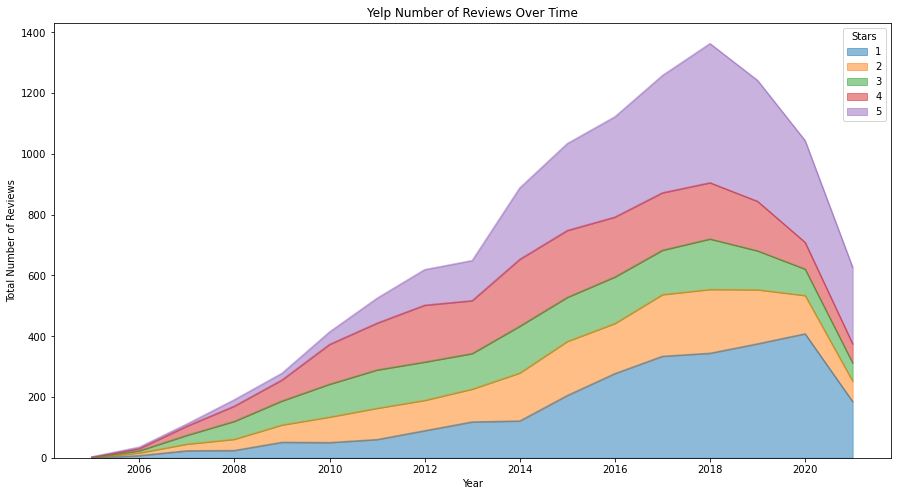

In [34]:
temp = results.groupby(['Year','Stars'])['Review'].agg('count').reset_index()
table = temp.pivot(index='Year', columns='Stars', values='Review')
table = table.fillna(0)
g = table.plot.area(alpha = 0.5, figsize = (15,8))
g.set(xlabel = 'Year', ylabel = 'Total Number of Reviews', title = 'Yelp Number of Reviews Over Time')

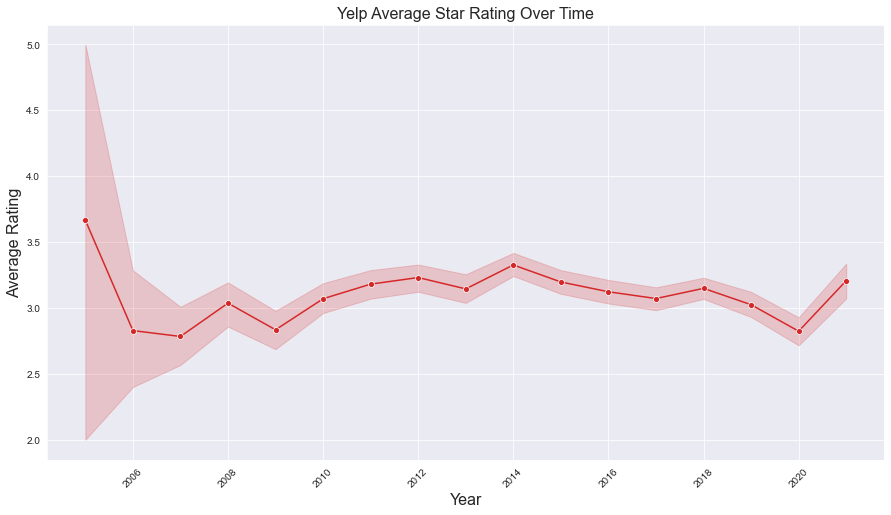

In [36]:
ax1 = sns.set_style(style='darkgrid', rc=None )
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.set_title('Yelp Average Star Rating Over Time', fontsize = 16)
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_ylabel('Average Rating', fontsize = 16)
ax1 = sns.lineplot(x = 'Year', y = 'Stars', marker = 'o', data = results, color = 'tab:red')
ax1.tick_params(axis = 'y')

plt.xticks(rotation = 45)
plt.show()

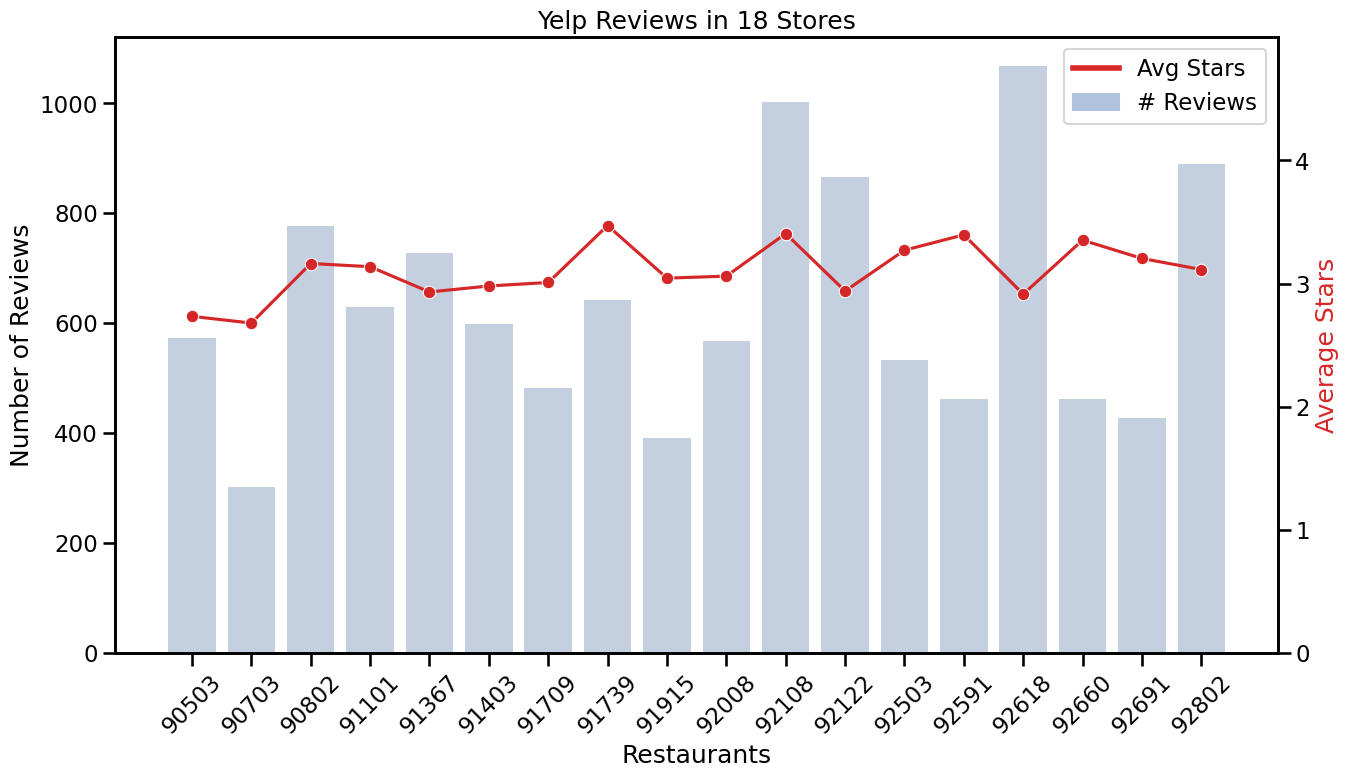

In [37]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
temp = results.groupby('Zip_Code')['Stars'].agg('count').reset_index()
temp2 = results.groupby('Zip_Code')['Stars'].agg('mean').reset_index()
matplotlib.rc_file_defaults()
sns.set_context('talk')
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(data = temp, x='Zip_Code', y='Stars', alpha=0.8, ax=ax1, color = '#B0C4DE')
ax1.set(xlabel = 'Restaurants', ylabel = 'Number of Reviews', title = 'Yelp Reviews in 18 Stores')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2 = ax1.twinx()
ax2.set_ylabel('Average Stars', color = 'tab:red')
sns.lineplot(data = temp2['Stars'], marker='o', sort = False, ax=ax2, color = 'tab:red')
ax2.tick_params(axis='y')
ax2.set(xlabel = 'Restaurants', ylabel = 'Average Stars')
ax2.set_ylim(0,5)
ax2.set_yticks(range(0,5))


legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Avg Stars'),
                   Patch(facecolor='#B0C4DE', edgecolor='#B0C4DE',label='# Reviews')]
ax1.legend(handles=legend_elements)


plt.show()

### Part 4. Yelp Reviews Scraping- Restaurant nearby P.F. Chang's

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random 
import time
from datetime import datetime
from tqdm import tqdm

from bs4 import BeautifulSoup as bs

from collections import Counter
import glob

In [ ]:
zipcode1=["91915","92008","92108","92122"]
temple_sd="https://www.yelp.com/search?find_desc=Restaurants&find_loc=San%20Diego%2C%20CA%20{}&start="
urls=[temple_sd.format(x)+"{}" for x in zipcode1]

zipcode2=['91739', "91709", "91101", "92503", "92802", "90703", "91367",'90503', '91403', '92691', '92591', '90802', '92618', '92660']
temple_socal="https://www.yelp.com/search?find_desc=Restaurants&find_loc=Southern%20California%2C%20CA%20{}&start="
urls=urls+[temple_socal.format(x)+"{}" for x in zipcode2]
zipcode=zipcode1+zipcode2

In [ ]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_experimental_option('w3c', False)
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('/usr/local/bin/chromedriver', options = chrome_options)

In [ ]:
def extract_data(soup):
    clist=[]
    trs=soup.find_all("li",class_="border-color--default__09f24__3Epto")
    for tr in trs:
        try:
            name=tr.find_all('span',class_="css-1pxmz4g")[0].a.text
            review_stat=tr.find_all("div",class_="display--inline-block__09f24__3SvIn border-color--default__09f24__3Epto",attrs={"aria-hidden":"false"})[0].findChildren()
            review_count=review_stat[0].text
            star=review_stat[1].div["aria-label"]
            star=re.search('[\d\.]+',star)[0]
            try:
                cat=tr.find_all("button",class_="badge__09f24__xWRsZ color--gray-extra-light__09f24__1ZCSL size--large__09f24__2JW1p badge--interactive__09f24__bhLsk")
                cat=",".join([x.text for x in cat])
            except:
                cat=np.nan
            try:
                price=tr.find_all("span",class_=re.compile("^priceRange"))[0].text
            except:
                price=np.nan
            clist.append([name,price,star,review_count,cat])
        except:
            pass
    df_temp=pd.DataFrame(clist,columns=["name","price","star","review_count","cat"])
    return df_temp

In [ ]:
for zcode,url in tqdm(zip(zipcode,urls)):
    
    print(f"Scape restaurant nearby {zcode}")
    
    df=pd.DataFrame()
    driver.get(url.format(0))
    time.sleep(random.uniform(4,9))
    html = driver.page_source
    soup=bs(html,"html.parser")
    num=int(re.findall("\d+ of (\d+)",soup.text)[0])
    df=df.append(extract_data(soup))

    for i in tqdm(np.arange(10,num*10,10)):

        driver.get(url.format(i))
        time.sleep(random.uniform(2,5))
        html = driver.page_source
        soup=bs(html,"html.parser")
        df=df.append(extract_data(soup))
        time.sleep(random.uniform(2,5))
    print(f" Saving {zcode} to csv")    
    df["zipcode"]=zcode
    today = datetime.now()
    Time = today.strftime("%d%H%M")
    df.drop_duplicates().to_csv("{}area_stat{}.csv".format(zcode,Time),index=False)

In [4]:
files=glob.glob("data/*area_stat*.csv")
df=pd.DataFrame()
for file in files:
    df=df.append(pd.read_csv(file))
df["peer"]=df.cat.apply(lambda x:1 if len(re.findall(r'sushi|japanese|asian fusion|chinese|korean|noodles|ramen|taiwanense|dim sum|Shanghainese',x,re.IGNORECASE))>0 else 0)
df.head()

,name,price,star,review_count,cat,zipcode,peer
0,Common Stock,$$,5.0,725,"American (New),Whiskey Bars,Cocktail Bars",92108,0
1,Trust,$$,4.5,1076,"American (New),Cocktail Bars",92108,0
2,Encontro North Park,$$,4.5,1298,"American (New),Burgers,Gastropubs",92108,0
3,The Smoking Goat,$$,4.0,1485,"French,American (New),Bars",92108,0
4,Puesto - Mission Valley,NaN,4.0,377,"Mexican,Bars,Desserts",92108,0


In [5]:
df.groupby("price")["star"].mean()

price
$       3.964595
$$      4.027537
$$$     4.046875
$$$$    4.250000
Name: star, dtype: float64

In [6]:
# similar restaurant average rating
df[df.peer==1].star.mean()

4.078516902944384

In [7]:
pf_avg=pd.read_csv("Zip_avgScore.csv")

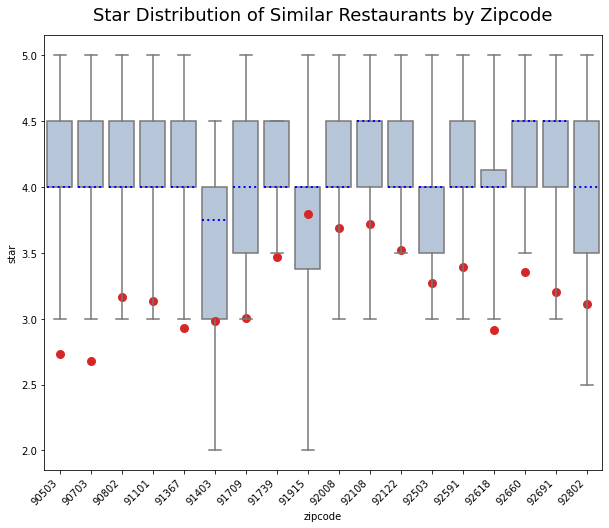

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y="star",x="zipcode",data=df[df.peer==1],ax=ax,whis=[0,100],color="#B0C4DE",medianprops=dict(color="blue",linestyle=':',linewidth=2))
plt.xticks(rotation=45, ha='right')
;
for i, score in pf_avg["Stars"].iteritems():
    ax.scatter(i,score,lw=3,c="tab:red")
ax.set_title("Star Distribution of Similar Restaurants by Zipcode",fontsize=18,pad=15);

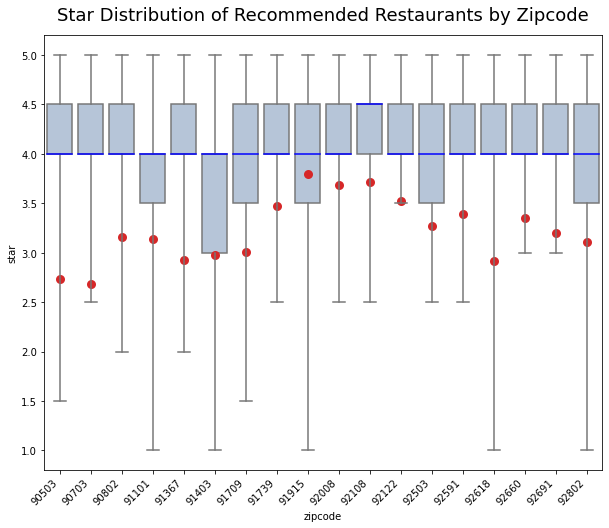

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y="star",x="zipcode",data=df,ax=ax,whis=[0,100],color="#B0C4DE",medianprops=dict(color="blue"))
plt.xticks(rotation=45, ha='right')
;
for i, score in pf_avg["Stars"].iteritems():
    ax.scatter(i,score,lw=3,c="tab:red")
    
ax.set_title("Star Distribution of Recommended Restaurants by Zipcode",fontsize=18,pad=15);

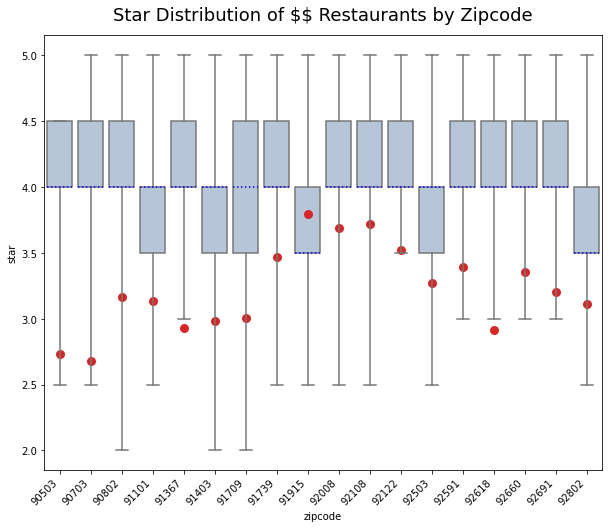

In [13]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y="star",x="zipcode",data=df[df.price=="$$"],ax=ax,whis=[0,100],color="#B0C4DE",medianprops=dict(color="blue",linestyle=':'))
plt.xticks(rotation=45, ha='right')


for i, score in pf_avg["Stars"].iteritems():
    ax.scatter(i,score,lw=3,c="tab:red")
    
ax.set_title("Star Distribution of \$$ Restaurants by Zipcode",fontsize=18,pad=15);

### Part 5. WordCloud & Topic Model

In [2]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output
from matplotlib import colors

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
# import data
df = pd.read_csv("PFChangs_Reviews2.csv")

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Source,Zip_Code,User_Name,Location,Time,Stars,Review,Year_Month,Year,Month
0,Yelp,90503,Mupa L.,"Torrance, CA",2016-11-26 00:00:00,1,I am completely SHOCKED at this establishment!...,2016-11,2016,11
1,Yelp,90503,Dennis N.,"Torrance, CA",2019-03-10 00:00:00,2,First let me say I love P.F. Chang's food. Th...,2019-03,2019,3
2,Yelp,90503,S R.,"Los Angeles, CA",2018-07-14 00:00:00,1,Messed up on my food a few times. Guy said it ...,2018-07,2018,7
3,Yelp,90503,Bonnie G.,"Simi Valley, CA",2012-04-20 00:00:00,1,Wished I would have read the yelps first but ...,2012-04,2012,4
4,Yelp,90503,Betsy I.,"Long Beach, CA",2015-05-31 00:00:00,2,Haven't been here a while but received a gift ...,2015-05,2015,5
...,...,...,...,...,...,...,...,...,...,...
14642,Yelp,92802,Denise B.,"San Francisco, CA",2010-01-03 00:00:00,4,Never fails in consistency for service or food...,2010-01,2010,1
14643,Yelp,92802,Mickey W.,"Tustin, CA",2012-11-05 00:00:00,5,Busy busy busy. My hubby and I visited PF Chan...,2012-11,2012,11
14644,Yelp,92802,Adryenn A.,"Reno, NV",2010-04-11 00:00:00,2,This review is limited to the reservation/wait...,2010-04,2010,4
14645,Yelp,92802,Caitlin N.,"Orange, CA",2015-12-23 00:00:00,1,Went to this restaurant for the first time. Ho...,2015-12,2015,12


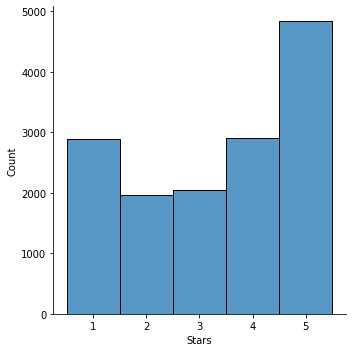

In [5]:
# rate distrbution
sns.displot(x = 'Stars', data = df, discrete=True)

In [6]:
# remove 'NaN' review, 4991 rows left
df = df.dropna(axis=0, how='any', thresh=None, subset=['Review'], inplace=False)

In [7]:
# remove PF, PF Chang
df['Review'] = df['Review'].str.replace("pf","")
df['Review'] = df['Review'].str.replace("P.F","")
df['Review'] = df['Review'].str.replace("PF","")
df['Review'] = df['Review'].str.replace("Chang","")

<ipython-input-7-a76ae5c1bfa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].str.replace("pf","")
<ipython-input-7-a76ae5c1bfa2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace("P.F","")
<ipython-input-7-a76ae5c1bfa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].str.replace("P.F","")
<ipython-input-7-a76ae5c1bfa2>:4: SettingWithCopyWarning: 
A value is try

In [8]:
# only get data whose rating is greater than 3
rate45 = df.loc[df.Stars > 3, :]
a = rate45[rate45.Year == 2020]
b = rate45[rate45.Year == 2021]
c = rate45[rate45.Year == 2019]
rate45_192021 = pd.concat([a, b, c], ignore_index=True)
rate45_192021

,Source,Zip_Code,User_Name,Location,Time,Stars,Review,Year_Month,Year,Month
0,Yelp,90503,Cesar M.,"Hawthorne, CA",2020-08-01 00:00:00,5,Had an amazing experience!! Our waiter was Mas...,2020-08,2020,8
1,Yelp,90503,Don C.,"Los Angeles, CA",2020-10-13 00:00:00,5,Me and the family had dinner at this P.f 's bi...,2020-10,2020,10
2,Yelp,90503,Kathleen R.,"Southwood, Torrance, CA",2020-07-05 00:00:00,4,Curbside pickup was very easy; parallel park a...,2020-07,2020,7
3,Yelp,90503,Madison K.,"El Dorado Hills, CA",2020-09-06 00:00:00,5,"Food was so good, I don't know why the reviews...",2020-09,2020,9
4,Yelp,90503,No Entourage Needed N.,"Malibu, CA",2020-09-12 00:00:00,5,@s Dinner For Two Menu is OUTSTANDING for the ...,2020-09,2020,9
...,...,...,...,...,...,...,...,...,...,...
2420,Yelp,92802,Nia B.,"Santa Ana, CA",2019-07-22 00:00:00,4,I appreciate 's for having delicious options ...,2019-07,2019,7
2421,Yelp,92802,Jon E.,"Morro Bay, CA",2019-07-12 00:00:00,5,So I have been coming to 's for about 20 yrs!...,2019-07,2019,7
2422,Yelp,92802,Nahshon P.,"Tehachapi, CA",2019-05-17 00:00:00,5,Josh!!!!!!! If all I could say is your name t...,2019-05,2019,5
2423,Yelp,92802,Jerry M.,"Tustin, CA",2019-04-04 00:00:00,4,"Located right near Disney Land, this s is con...",2019-04,2019,4


In [9]:
# only get data whose rating is less and equal to 3
rate3 = df.loc[df.Stars == 3, :]
a = rate3[rate3.Year == 2020]
b = rate3[rate3.Year == 2021]
c = rate3[rate3.Year == 2019]
rate3_192021 = pd.concat([a, b, c], ignore_index=True)

In [10]:
# only get data whose rating is less than 3
rate12 = df.loc[df.Stars < 3, :]
a = rate12[rate12.Year == 2020]
b = rate12[rate12.Year == 2021]
c = rate12[rate12.Year == 2019]
rate12_192021 = pd.concat([a, b, c], ignore_index=True)

#### Data Processing

In [11]:
# data processing

import nltk
# downloads needed models
nltk.download('punkt') 
nltk.download('stopwords') 

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

# create text pre-processing founction
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # create initial token list
    tokens = []
    # step 1 : get sentence
    sentences = sent_tokenize(doc)
    # step 2 :  get the word from each stence
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 :  get the token from each word
        if stemming:
            words = [ps.stem(word) for word in words]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    # step 4 :  get the lower case token
    tokens = [w.lower() for w in tokens if w not in stop]
    # step 5: remove empty tokens
    import re
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token) != '']
    #tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token) != '']
    return tokens

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
rate45_192021_nltk = rate45_192021.Review.apply(pre_processing_by_nltk)
rate45_192021['nltk'] = 0

In [13]:
rate45_192021['nltk'] = rate45_192021_nltk
rate45_192021

,Source,Zip_Code,User_Name,Location,Time,Stars,Review,Year_Month,Year,Month,nltk
0,Yelp,90503,Cesar M.,"Hawthorne, CA",2020-08-01 00:00:00,5,Had an amazing experience!! Our waiter was Mas...,2020-08,2020,8,"[amaz, experi, waiter, wa, master, probabl, be..."
1,Yelp,90503,Don C.,"Los Angeles, CA",2020-10-13 00:00:00,5,Me and the family had dinner at this P.f 's bi...,2020-10,2020,10,"[famili, dinner, thi, pf, s, bistro, 10132020,..."
2,Yelp,90503,Kathleen R.,"Southwood, Torrance, CA",2020-07-05 00:00:00,4,Curbside pickup was very easy; parallel park a...,2020-07,2020,7,"[curbsid, pickup, wa, veri, easi, parallel, pa..."
3,Yelp,90503,Madison K.,"El Dorado Hills, CA",2020-09-06 00:00:00,5,"Food was so good, I don't know why the reviews...",2020-09,2020,9,"[food, wa, good, nt, know, whi, review, seem, ..."
4,Yelp,90503,No Entourage Needed N.,"Malibu, CA",2020-09-12 00:00:00,5,@s Dinner For Two Menu is OUTSTANDING for the ...,2020-09,2020,9,"[dinner, two, menu, outstand, low, price, 3200..."
...,...,...,...,...,...,...,...,...,...,...,...
2420,Yelp,92802,Nia B.,"Santa Ana, CA",2019-07-22 00:00:00,4,I appreciate 's for having delicious options ...,2019-07,2019,7,"[appreci, s, delici, option, nonmeat, eater, t..."
2421,Yelp,92802,Jon E.,"Morro Bay, CA",2019-07-12 00:00:00,5,So I have been coming to 's for about 20 yrs!...,2019-07,2019,7,"[come, s, 20, yr, tonight, wa, probabl, best, ..."
2422,Yelp,92802,Nahshon P.,"Tehachapi, CA",2019-05-17 00:00:00,5,Josh!!!!!!! If all I could say is your name t...,2019-05,2019,5,"[josh, could, say, name, thi, would, great, re..."
2423,Yelp,92802,Jerry M.,"Tustin, CA",2019-04-04 00:00:00,4,"Located right near Disney Land, this s is con...",2019-04,2019,4,"[locat, right, near, disney, land, thi, conven..."


In [14]:
rate3_192021_nltk = rate3_192021.Review.apply(pre_processing_by_nltk)
rate3_192021['nltk'] = 0

In [15]:
rate3_192021['nltk'] = rate3_192021_nltk
rate3_192021

,Source,Zip_Code,User_Name,Location,Time,Stars,Review,Year_Month,Year,Month,nltk
0,Yelp,90503,Francesco L.,"Torrance, CA",2020-02-21 00:00:00,3,So my wife and I went on Valentine's Day. Norm...,2020-02,2020,2,"[wife, went, valentin, s, day, normal, would, ..."
1,Yelp,90503,Rianne A.,"Torrance, CA",2020-08-23 00:00:00,3,Available for pickup during COVID. The sushi w...,2020-08,2020,8,"[avail, pickup, dure, covid, sushi, wa, good, ..."
2,Yelp,90503,Betty B.,"Wilmington, CA",2020-02-02 00:00:00,3,I've gotten takeout and eaten at . 's for year...,2020-02,2020,2,"[ve, gotten, takeout, eaten, s, year, m, sure,..."
3,Yelp,90503,Jayna S.,"Monroe, MI",2020-08-01 00:00:00,3,Our food was just ok. Not enough sauce with ou...,2020-08,2020,8,"[food, wa, ok, enough, sauc, entre, chicken, l..."
4,Yelp,90503,Paulina N.,"Hawthorne, CA",2020-10-02 00:00:00,3,"My bf and I went on a weekend day, and they ha...",2020-10,2020,10,"[bf, went, weekend, day, start, outdoor, seat,..."
...,...,...,...,...,...,...,...,...,...,...,...
404,Yelp,92802,Telly P.,"Lake Elsinore, CA",2019-12-26 00:00:00,3,First impressions are everything and it's for ...,2019-12,2019,12,"[first, impress, everyth, s, thi, reason, m, s..."
405,Yelp,92802,K W.,"Rocklin, CA",2019-12-31 00:00:00,3,The vegetarian lettuce wraps filling were dry ...,2019-12,2019,12,"[vegetarian, lettuc, wrap, fill, dri, tasteles..."
406,Yelp,92802,Max L.,"Oakland, CA",2019-12-10 00:00:00,3,A colleague and I were in town for a conferenc...,2019-12,2019,12,"[colleagu, town, confer, sever, day, walk, mar..."
407,Yelp,92802,Hebe L.,"Seattle, WA",2019-12-19 00:00:00,3,The food is average. The waiters are nice howe...,2019-12,2019,12,"[food, averag, waiter, nice, howev, veri, veri..."


In [16]:
rate12_192021_nltk = rate12_192021.Review.apply(pre_processing_by_nltk)
rate12_192021['nltk'] = 0

In [17]:
rate12_192021['nltk'] = rate12_192021_nltk
rate12_192021

,Source,Zip_Code,User_Name,Location,Time,Stars,Review,Year_Month,Year,Month,nltk
0,Yelp,90503,Luis E.,"Oxnard, CA",2020-08-30 00:00:00,1,Came in with my family after calling the resta...,2020-08,2020,8,"[came, famili, call, restaur, see, time, close..."
1,Yelp,90503,Norma G.,"Hawthorne, CA",2020-12-23 00:00:00,1,I was super excited to try the coconut mojito ...,2020-12,2020,12,"[wa, super, excit, tri, coconut, mojito, s, go..."
2,Yelp,90503,Emily A.,"Torrance, CA",2020-12-29 00:00:00,1,This restaurant is terrible! I ordered take ou...,2020-12,2020,12,"[thi, restaur, terribl, order, take, pick, chr..."
3,Yelp,90503,Chelsea K.,"Torrance, CA",2020-09-26 00:00:00,1,We came on a Saturday night so we expected it ...,2020-09,2020,9,"[came, saturday, night, expect, busi, everywhe..."
4,Yelp,90503,Jacky Y.,"Vancouver, Canada",2020-10-14 00:00:00,1,I'd like to rate 0 if I could. Terrible servic...,2020-10,2020,10,"[d, like, rate, 0, could, terribl, servic, gre..."
...,...,...,...,...,...,...,...,...,...,...,...
1559,Yelp,92802,Amit G.,"Placentia, CA",2019-09-16 00:00:00,1,What an horrible experience on non-busy day.I ...,2019-09,2019,9,"[horribl, experi, nonbusi, dayi, wa, sept, 14t..."
1560,Yelp,92802,Ed I.,"Calgary, Canada",2019-08-24 00:00:00,2,My family and me use to like coming here when ...,2019-08,2019,8,"[famili, use, like, come, visit, disney, area,..."
1561,Yelp,92802,Suzy Q.,"Las Vegas, NV",2019-10-28 00:00:00,2,Horrible service...ughhh! The waiter took fore...,2019-10,2019,10,"[horribl, servic, ughhh, waiter, took, forev, ..."
1562,Yelp,92802,Jo B.,"Anaheim, CA",2019-05-11 00:00:00,1,This place lost its greatness. As soon as we ...,2019-05,2019,5,"[thi, place, lost, great, soon, enter, door, p..."


### WordCould 1-gram

#### 1&2 Star

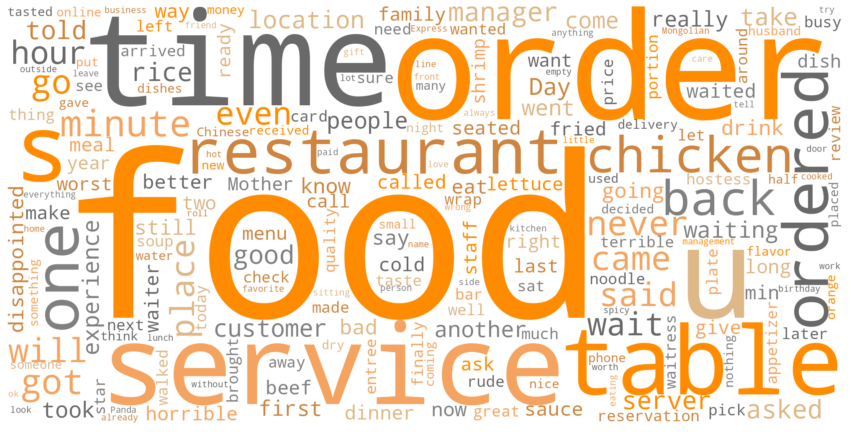

In [18]:
#Importing Libraries
%matplotlib inline
from wordcloud import WordCloud

#Creating the text variable
text2 = " ".join(title for title in rate12_192021.Review)

# set color
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white',width=2000, height=1000,colormap=colormap).generate(text2)

# Display the generated Word Cloud
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# word_cloud2.to_file('test.png')

#### 3 Star

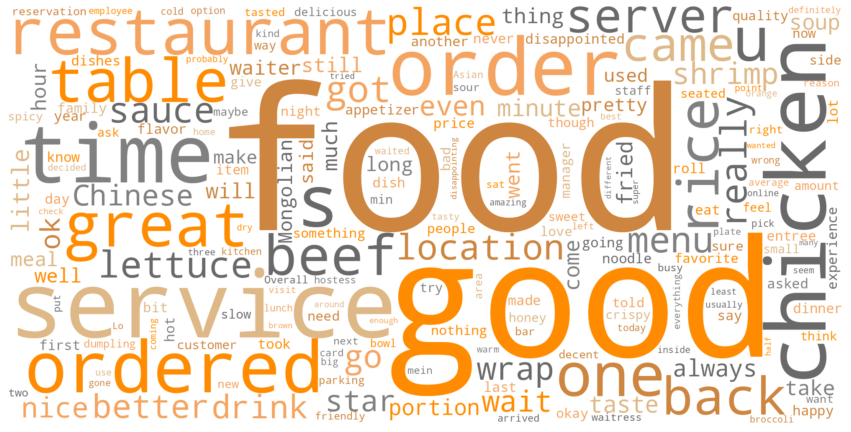

In [19]:
#Importing Libraries
%matplotlib inline
from wordcloud import WordCloud

#Creating the text variable
text2 = " ".join(title for title in rate3_192021.Review)

# set color
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white',width=2000, height=1000, colormap=colormap).generate(text2)

# Display the generated Word Cloud
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 4&5 Star

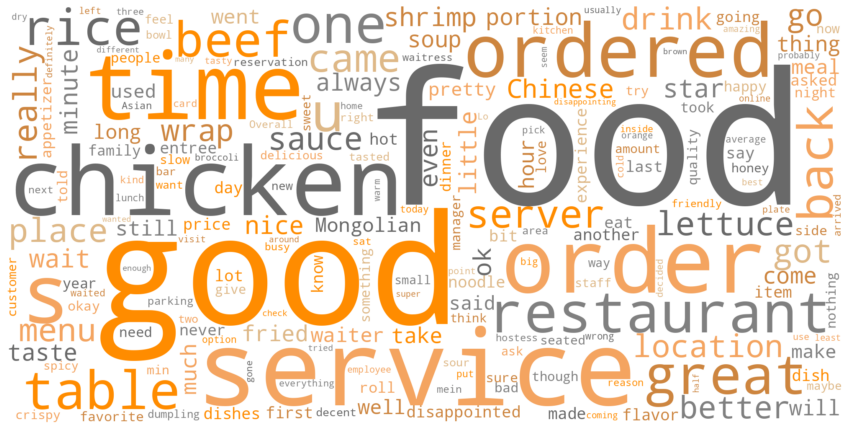

In [20]:
#Importing Libraries
%matplotlib inline
from wordcloud import WordCloud

#Creating the text variable
text2 = " ".join(title for title in rate3_192021.Review)

# set color
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000, colormap=colormap).generate(text2)

# Display the generated Word Cloud
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### WordCould 2-gram

In [ ]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [21]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {" ".join(words): "_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams


def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts


def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text


def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(very_processed_texts)

In [22]:
wordnet_lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
translate_table = dict((ord(char), " ") for char in string.punctuation)

In [23]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)

#### 3 Star

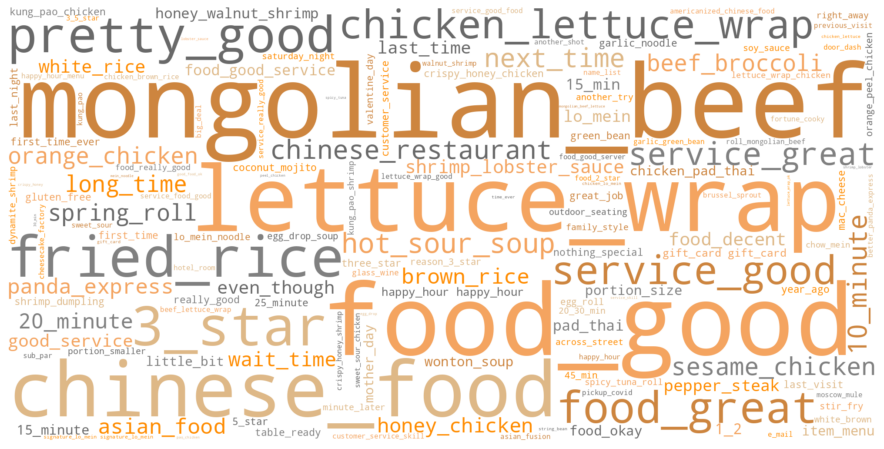

In [24]:
records = rate3_192021
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color="white",
                      collocations=10,
                      colormap=colormap,# set color
                      width=2000, height=1000).generate(use_ngrams_only(records["Review"], wordnet_lemmatizer, translate_table, stop))

#plot the wordcloud object
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilInear')

plt.axis('off')
plt.show()

#wordcloud.to_file("3star-2gram.png")

#### 1,2 Star

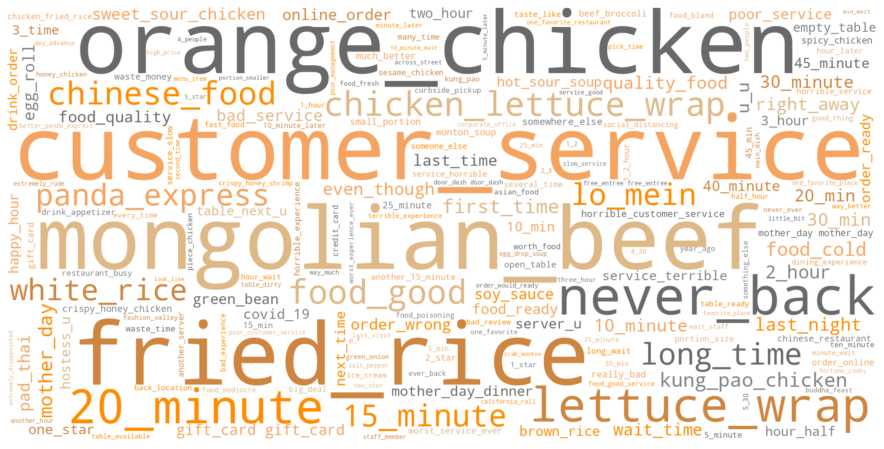

In [25]:
records = rate12_192021
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color="white",
                      collocations=10,
                      colormap=colormap,# set color
                      width=2000, height=1000).generate(use_ngrams_only(records["Review"], wordnet_lemmatizer, translate_table, stop))

#plot the wordcloud object
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilInear')

plt.axis('off')
plt.show()
#wordcloud.to_file("1,2star-2gram.png")

#### 4,5 Star

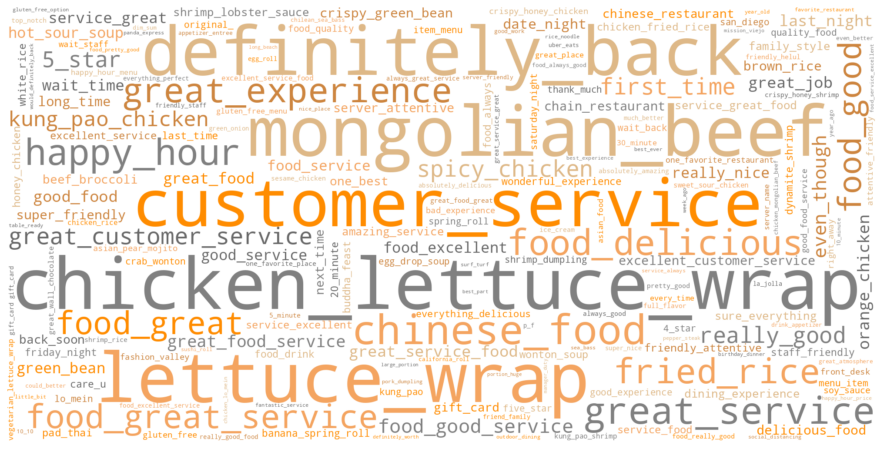

In [26]:
records = rate45_192021
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color="white",
                      collocations=10,
                      colormap=colormap,# set color
                      width=2000, height=1000).generate(use_ngrams_only(records["Review"], wordnet_lemmatizer, translate_table, stop))

#plot the wordcloud object
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilInear')

plt.axis('off')
plt.show()
#wordcloud.to_file("4,5star-2gram.png")

### Topic Model

#### 4&5 Star

In [49]:
dictionary = gensim.corpora.Dictionary(rate45_192021.nltk)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in rate45_192021.nltk]

In [50]:
#Preview BOW for our sample preprocessed document

document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 4 ("experi") appears 1 time.
Word 26 ("thi") appears 2 time.
Word 54 ("order") appears 1 time.
Word 63 ("sinc") appears 1 time.
Word 114 ("locat") appears 2 time.
Word 208 ("accommod") appears 1 time.
Word 215 ("made") appears 1 time.
Word 228 ("comfort") appears 1 time.
Word 282 ("ha") appears 2 time.
Word 333 ("hospit") appears 1 time.
Word 336 ("kind") appears 1 time.
Word 400 ("acknowledg") appears 1 time.
Word 401 ("deserv") appears 1 time.
Word 402 ("incred") appears 1 time.
Word 403 ("manag") appears 1 time.
Word 404 ("pandem") appears 1 time.
Word 405 ("safe") appears 1 time.
Word 406 ("staff") appears 1 time.
Word 407 ("store") appears 2 time.
Word 408 ("welcom") appears 1 time.


In [51]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 12,
                                   workers = 2)

In [52]:
# For each topic, we will explore the words occuring in that topic and its relative weight

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.079*"wa" + 0.016*"s" + 0.013*"nt" + 0.013*"good" + 0.011*"chicken" + 0.011*"veri" + 0.010*"came" + 0.009*"order" + 0.009*"rice" + 0.008*"time"


Topic: 1 
Words: 0.069*"wa" + 0.063*"servic" + 0.062*"great" + 0.039*"good" + 0.030*"veri" + 0.016*"thi" + 0.015*"excel" + 0.014*"s" + 0.014*"place" + 0.011*"friendli"


Topic: 2 
Words: 0.025*"wa" + 0.024*"time" + 0.020*"thi" + 0.017*"wait" + 0.016*"order" + 0.013*"s" + 0.013*"us" + 0.011*"servic" + 0.010*"tabl" + 0.009*"restaur"


Topic: 3 
Words: 0.042*"wa" + 0.021*"translat" + 0.021*"googl" + 0.018*"good" + 0.017*"veri" + 0.015*"place" + 0.014*"origin" + 0.014*"menu" + 0.012*"thi" + 0.011*"delici"


Topic: 4 
Words: 0.056*"wa" + 0.021*"chicken" + 0.015*"lettuc" + 0.015*"wrap" + 0.013*"great" + 0.012*"thi" + 0.012*"good" + 0.012*"roll" + 0.011*"order" + 0.008*"fri"


Topic: 5 
Words: 0.058*"wa" + 0.021*"server" + 0.017*"great" + 0.015*"thi" + 0.015*"us" + 0.014*"s" + 0.014*"amaz" + 0.013*"time" + 0.013*"servic" + 0.012*"m

### 3 Star

In [53]:
dictionary = gensim.corpora.Dictionary(rate3_192021.nltk)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in rate3_192021.nltk]

In [54]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 12,
                                   workers = 2)

In [55]:
# For each topic, we will explore the words occuring in that topic and its relative weight

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.022*"good" + 0.016*"order" + 0.013*"honey" + 0.012*"time" + 0.012*"s" + 0.012*"thi" + 0.012*"servic" + 0.011*"favorit" + 0.011*"wait" + 0.011*"also"


Topic: 1 
Words: 0.023*"s" + 0.020*"thi" + 0.019*"nt" + 0.017*"order" + 0.015*"time" + 0.013*"good" + 0.011*"get" + 0.011*"veri" + 0.010*"tabl" + 0.009*"restaur"


Topic: 2 
Words: 0.027*"nt" + 0.018*"s" + 0.017*"chicken" + 0.016*"good" + 0.015*"portion" + 0.014*"us" + 0.013*"thi" + 0.012*"order" + 0.012*"becaus" + 0.012*"price"


Topic: 3 
Words: 0.032*"servic" + 0.027*"good" + 0.023*"chicken" + 0.023*"s" + 0.018*"veri" + 0.015*"locat" + 0.013*"nt" + 0.012*"ok" + 0.012*"great" + 0.012*"dish"


Topic: 4 
Words: 0.025*"good" + 0.023*"order" + 0.020*"rice" + 0.017*"thi" + 0.015*"chicken" + 0.015*"shrimp" + 0.015*"sauc" + 0.014*"veri" + 0.013*"nt" + 0.013*"like"


Topic: 5 
Words: 0.018*"use" + 0.016*"order" + 0.016*"servic" + 0.015*"card" + 0.013*"deliveri" + 0.013*"pay" + 0.013*"bowl" + 0.012*"chicken" + 0.012*"tast" + 

### 1&2 Star

In [56]:
dictionary = gensim.corpora.Dictionary(rate12_192021.nltk)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in rate12_192021.nltk]

In [57]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 12,
                                   workers = 2)

In [58]:
# For each topic, we will explore the words occuring in that topic and its relative weight

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.025*"order" + 0.023*"nt" + 0.019*"good" + 0.018*"even" + 0.016*"s" + 0.016*"thi" + 0.011*"servic" + 0.011*"go" + 0.011*"rice" + 0.009*"get"


Topic: 1 
Words: 0.023*"thi" + 0.022*"s" + 0.013*"dish" + 0.012*"order" + 0.012*"chicken" + 0.011*"nt" + 0.010*"time" + 0.010*"restaur" + 0.009*"one" + 0.009*"disappoint"


Topic: 2 
Words: 0.025*"us" + 0.022*"nt" + 0.016*"tabl" + 0.015*"thi" + 0.014*"ask" + 0.012*"server" + 0.011*"servic" + 0.011*"wait" + 0.011*"minut" + 0.010*"get"


Topic: 3 
Words: 0.030*"chicken" + 0.023*"nt" + 0.017*"order" + 0.017*"s" + 0.014*"like" + 0.013*"tast" + 0.012*"shrimp" + 0.011*"veri" + 0.010*"sauc" + 0.009*"beef"


Topic: 4 
Words: 0.043*"order" + 0.024*"s" + 0.020*"thi" + 0.015*"call" + 0.015*"wait" + 0.014*"nt" + 0.012*"day" + 0.012*"hour" + 0.012*"would" + 0.011*"time"


Topic: 5 
Words: 0.029*"wait" + 0.026*"tabl" + 0.019*"us" + 0.015*"minut" + 0.014*"seat" + 0.013*"ask" + 0.013*"thi" + 0.012*"would" + 0.012*"nt" + 0.012*"min"


Topic: 6 

### WordCloud about service realted review(1,2 Star)

In [46]:
text=df[(df.Stars<3) & (df.Time>"2018-12-31")].Review.str.lower()

In [47]:
service = ['service']
low_service = [s for s in text if any(xs in s for xs in service)]
len(low_service)

527

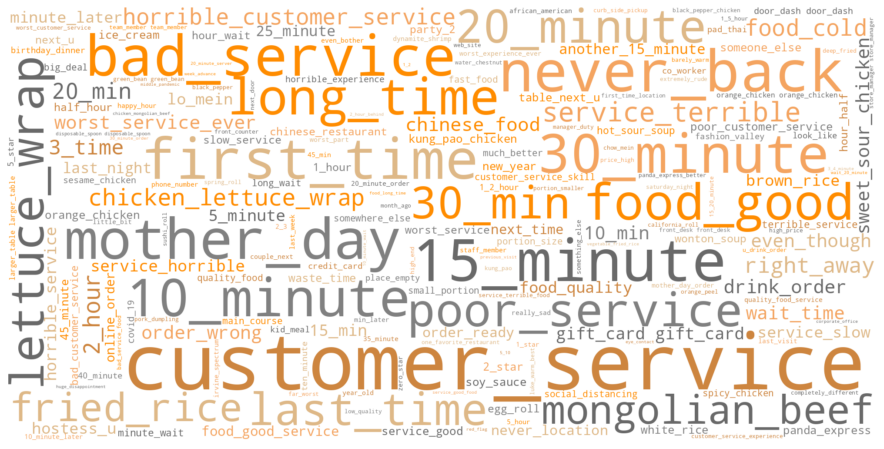

In [48]:
records = low_service
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color="white",
                      collocations=True,
                      colormap=colormap,# set color
                      width=2000, height=1000).generate(use_ngrams_only(low_service, wordnet_lemmatizer, translate_table, stop))

#plot the wordcloud object
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilInear')

plt.axis('off')
plt.show()

#### WordCloud about service realted review(1,2 Star)

In [44]:
service = ['portion']
low_service = [s for s in text if any(xs in s for xs in service)]
len(low_service)

103

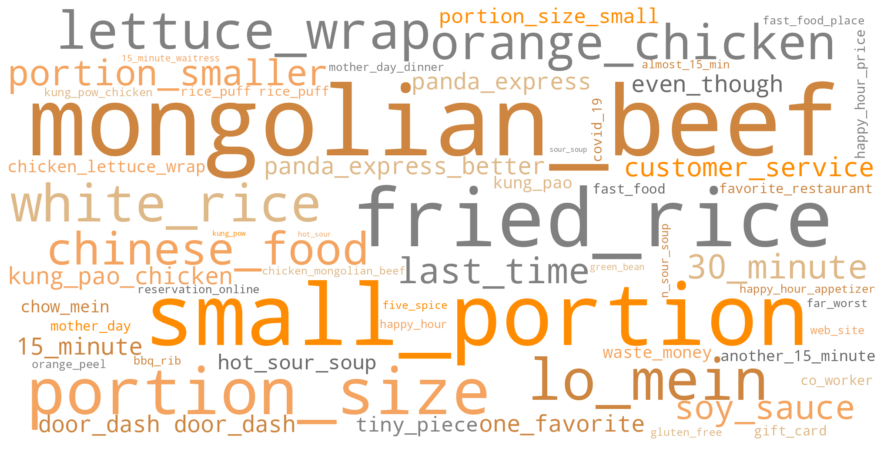

In [45]:
records = low_service
color_list=['#696969','#FF8C00', '#DEB887','#F4A460','#CD853F','#808080'] # build color list
colormap=colors.ListedColormap(color_list) # call function
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color="white",
                      collocations=True,
                      colormap=colormap,# set color
                      width=2000, height=1000).generate(use_ngrams_only(low_service, wordnet_lemmatizer, translate_table, stop))

#plot the wordcloud object
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilInear')

plt.axis('off')
plt.show()